#**Assignment 1: Multi-layer perceptron**

In [27]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

##**Data**

Data: CIFAR-10

CIFAR-10  is an established computer-vision dataset used for object recognition. It is a subset of the 80 million tiny images dataset and consists of 60,000 32x32 **color images** containing one of 10 object classes, with 6000 images per class.

Labels are as follows:

airplane (0), automobile (1), bird (2), cat (3), deer (4), dog (5), frog (6), horse (7), ship (8), truck (9)

Source: https://www.kaggle.com/c/cifar-10

### Q1. This dataset has been included in **keras.datasets.cifar10**. Please load the dataset and print the shape of training and testing sets.

In [28]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (50000, 32, 32, 3) (50000, 1)
Testing set shape: (10000, 32, 32, 3) (10000, 1)


### Q2. Show the first 9 instances of the training dataset.

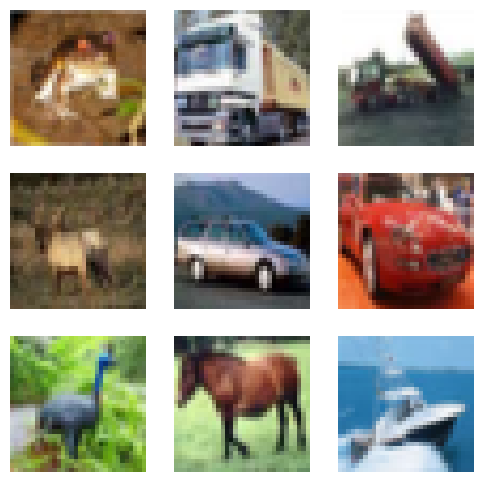

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i])
    plt.axis('off')
plt.show()

### Q3. Convert the target labels (y) into the one-hot format and show the value (y) for the first instance of the training dataset.

In [33]:
y_train_one_hot = keras.utils.to_categorical(y_train, num_classes=10)
print("One-hot encoded label for the first instance:", y_train_one_hot[0])

One-hot encoded label for the first instance: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


### Q4. Create a validation dataset using the first 5,000 instances in the training dataset. Also, divide all input features (X values) in the train/test/validation sets by 255.0. Please show the y value for the first instance of the validation dataset.

In [34]:
X_val = X_train[:5000] / 255.0
y_val = y_train_one_hot[:5000]
X_train = X_train[5000:] / 255.0
y_train_one_hot = y_train_one_hot[5000:]
X_test = X_test / 255.0

print("One-hot encoded label for the first instance of validation dataset:", y_val[0])

One-hot encoded label for the first instance of validation dataset: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


## **Model**

### Q5. Create a multi-layer perceptron model with 200 neurons in the first hidden layer and 100 neurons in the second hidden layer, and print the model summary.

### Please note that the input images are color images with the shape of **32 * 32 * 3**. Here 3 shows RGB.

In [35]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

/Users/nimeng/PycharmProjects/ISBA_2414/.venv/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 200)            │       614,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 635,710 (2.43 MB)

 Trainable params: 635,710 (2.43 MB)

 Non-trainable params: 0 (0.00 B)

### Q6. Create an Adam optimizer with a learning rate of 0.001, compile the model, and fit it on the training and validation datasets. Use the following hyperparameters: **batch_size=512, epochs=20**.

### *Hint*: Adam optimizer can be imported by **keras.optimizers.Adam(learning_rate=0.001)**



In [36]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train_one_hot,
                    validation_data=(X_val, y_val),
                    batch_size=512,
                    epochs=20)


Epoch 1/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.2811 - loss: 2.0001 - val_accuracy: 0.3546 - val_loss: 1.8255
Epoch 2/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3627 - loss: 1.7959 - val_accuracy: 0.3742 - val_loss: 1.7551
Epoch 3/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3963 - loss: 1.7100 - val_accuracy: 0.4106 - val_loss: 1.6718
Epoch 4/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4110 - loss: 1.6539 - val_accuracy: 0.4180 - val_loss: 1.6363
Epoch 5/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4292 - loss: 1.6114 - val_accuracy: 0.4336 - val_loss: 1.6011
Epoch 6/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4462 - loss: 1.5669 - val_accuracy: 0.4446 - val_loss: 1.5647
Epoch 7/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4583 - loss: 1.5336 - val_accuracy: 0.4446 - val_loss: 1.5599
Epoch 8/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4622 - loss: 1.5162 - val_accuracy: 0.4592 - val_loss

## **Performance**

### Q7. Evaluate your model.

In [37]:
test_loss, test_accuracy = model.evaluate(X_test, keras.utils.to_categorical(y_test, num_classes=10))
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - accuracy: 0.4872 - loss: 1.4619
Test Loss: 1.4618747234344482
Test Accuracy: 0.487199991941452


### Q8. Show the predicted probabilities for the test dataset.

In [38]:
predicted_probabilities = model.predict(X_test)
print("Predicted probabilities for the test dataset:", predicted_probabilities)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step
Predicted probabilities for the test dataset: [[1.08099850e-02 5.47136031e-02 4.65552062e-02 ... 7.00981473e-04
  5.90526238e-02 3.90825327e-03]
 [3.03415190e-02 1.15410477e-01 6.19507860e-04 ... 1.40490753e-04
  8.98268372e-02 7.62978911e-01]
 [2.34907955e-01 1.94184542e-01 1.54534425e-03 ... 9.62166581e-04
  2.76010245e-01 2.91488200e-01]
 ...
 [1.55903539e-03 1.05266704e-03 1.50233269e-01 ... 6.47842931e-03
  5.65761793e-03 2.88218376e-03]
 [1.88681185e-02 1.65399201e-02 2.03480095e-01 ... 8.63821711e-03
  1.50517831e-02 1.21028069e-02]
 [8.76120478e-02 5.33118146e-03 1.19501255e-01 ... 4.65833038e-01
  1.75151974e-02 9.31262784e-03]]


### Q9. Show the predicted labels for the test dataset.


In [40]:
predicted_labels = np.argmax(predicted_probabilities, axis=1)
print("Predicted labels for the test dataset:", predicted_labels)

Predicted labels for the test dataset: [3 9 9 ... 3 6 7]


### Q10. Show the confusion matrix.


Confusion Matrix:
 [[649  43  22  23  14   6  54  13  80  96]
 [ 49 613   8  19   3   6  27  11  32 232]
 [132  35 269 110  81  43 231  47  14  38]
 [ 52  36  47 387  27  84 241  25  24  77]
 [101  12  98  76 325  23 263  54  13  35]
 [ 56  24  59 286  41 235 183  45  25  46]
 [ 12  20  31  64  53  12 768   4  12  24]
 [102  27  44  77  64  45  94 429   7 111]
 [167  72   6  34  14   1  22   6 529 149]
 [ 48 152   5  29   6   7  33  25  27 668]]


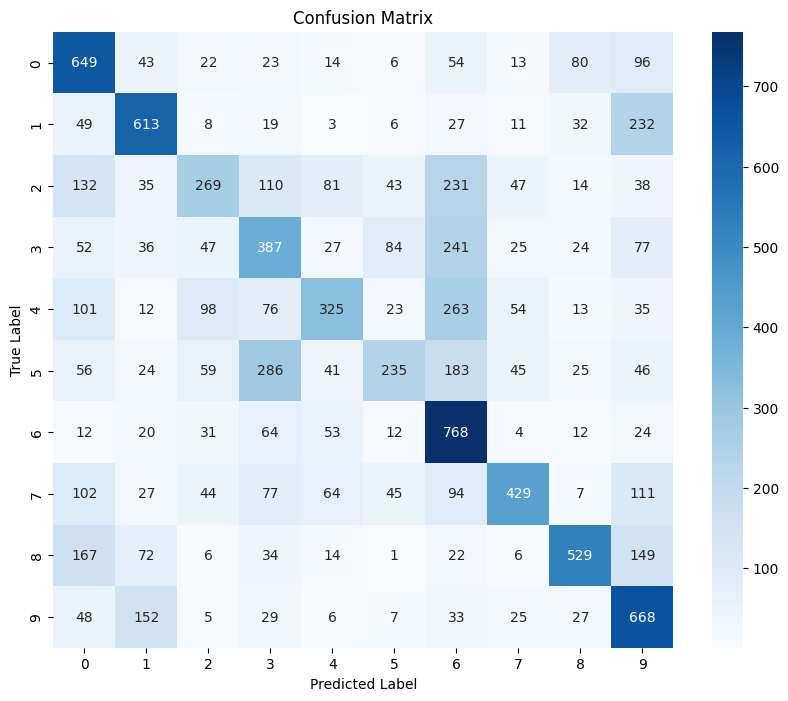

In [41]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, predicted_labels)
print("Confusion Matrix:\n", conf_matrix)

import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## **Post-analysis**

### Q11. Plot the loss and accuracy for the training and validation sets.


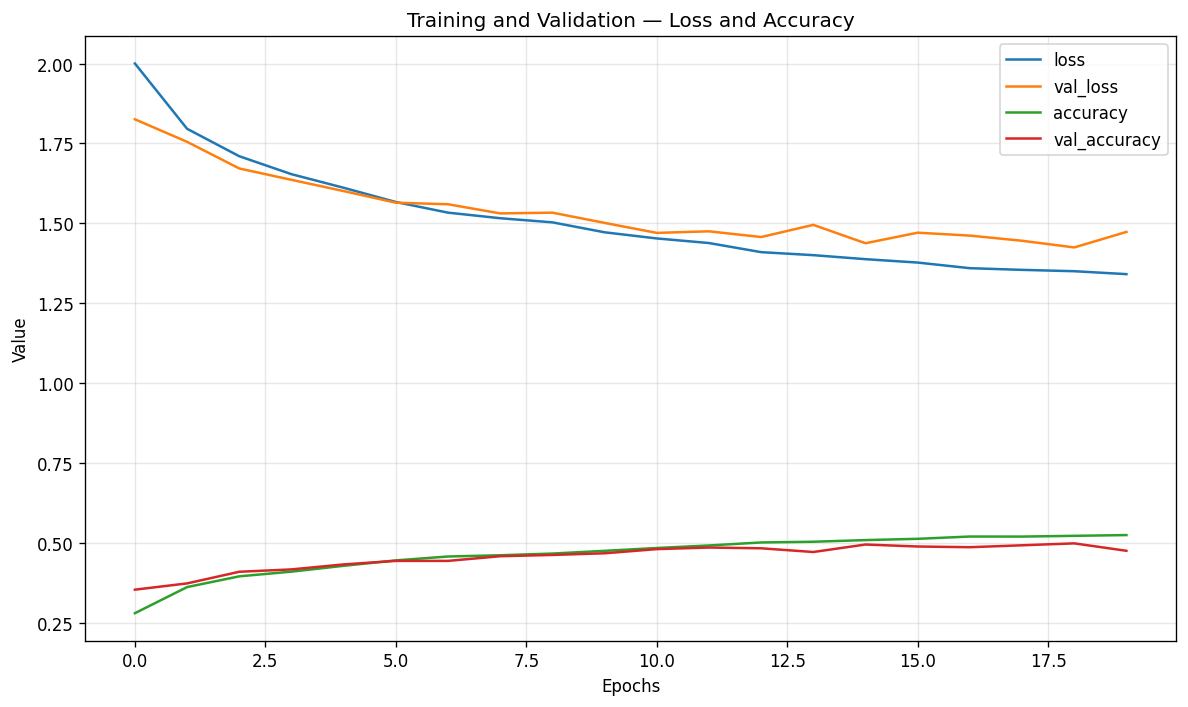

In [42]:
plt.figure(figsize=(10,6), dpi=120)

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')

plt.title('Training and Validation — Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### Q12. Show the first 9 images that the actual value is different from the predicted value.

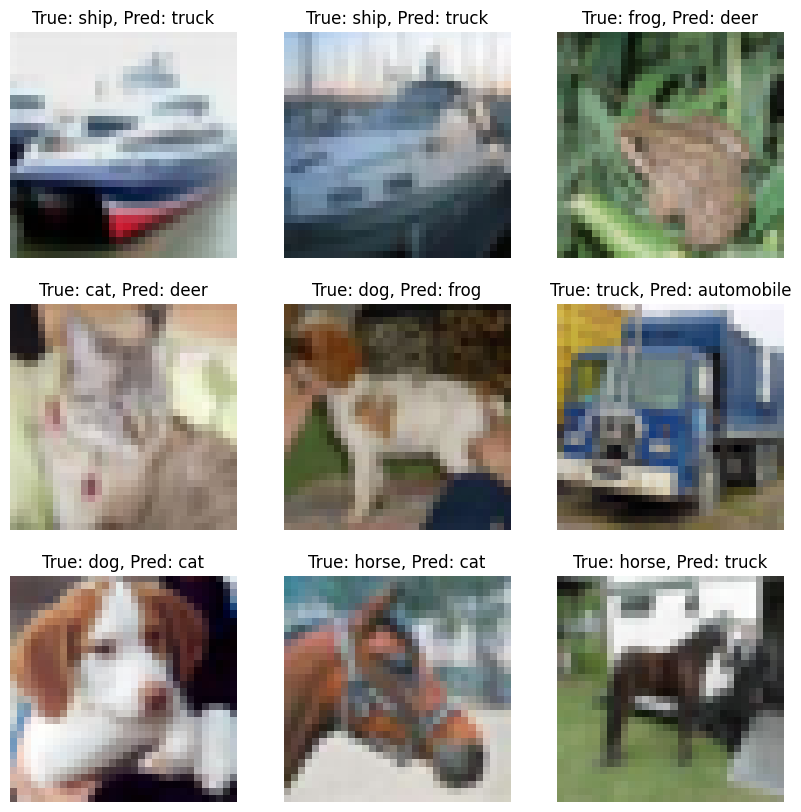

In [45]:
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
incorrect_indices = np.where(y_test.flatten() != predicted_labels)[0]

plt.figure(figsize=(10,10))
for i, index in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[index])
    true_label = label_names[y_test[index][0]]
    pred_label = label_names[predicted_labels[index]]
    plt.title(f'True: {true_label}, Pred: {pred_label}')
    plt.axis('off')
plt.show()
